In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore warnings from imported libraries

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv
/kaggle/input/video-games-sales-as-at-22-dec-2016csv/Video_Games_Sales_as_at_22_Dec_2016.csv


# Raditya Pratama
# 
# Forecasting video game sales prediction using regression



The following model involves to **predict the sales outcome of a video game title in a given period of time**. It tries to forecast the copies sold in the observed regions across the world, predominantly from North America, Europe, Japan and etc...

**Scope of the problem addressed is how video game publishers can predict the value and profitability from making the sales in video games**, ranging from the features that affect the sales towards the audience liking, for example, how attractive the *name* is, what popular *platforms* do players use at that time, along with the important factor of *genre* which determines the users' liking on a certain game aspect and observing the global sales overtime to show which region does a specific video game have the high rating for the database worldwide - region varies due to the predominance of income, status and access to technology.

In this project, it will adopt the linear regression method to be applied in the imported dataset. Although the main issue is that there is no quantitative independent variables, therefore the categorical variables such as *platform, genre, publisher* must be converted to numeric first before proceeding.

The dataset description involves the registered list of video game titles with over 100,000 copies sold in multiple regions.

Variable fields include:

Rank - Ranking of overall sales

* Name - The games name

* Platform - Platform of the games release (Wii, Xbox, PS, PC)
 
* Year - Year of the game's release
 
* Genre - Genre of the game
 
* Publisher - Publisher of the game
 
* NA_Sales - Sales in North America (in millions)
 
* EU_Sales - Sales in Europe (in millions)
 
* JP_Sales - Sales in Japan (in millions)
 
* Other_Sales - Sales in the rest of the world (in millions)
 
* Global_Sales - Total worldwide sales.

* Critic_Score - given score from reviewers

* User_Score - given score from audiences who bought the game

* Developer - Developer of the game

* Rating - Age rating of the video game mentioned

# Initialization of preprocessing the data:


* Collect the data: gather the data on various features that affect the sale of the video game, such as the platform used (Switch, Xbox, PS), its rating, its publisher and marketing budget.
* Prepare the data: clean the data and remove the missing values or outliers. Then to encode it into numerical variables (preprocessing with scikit) using one-hot encoding/label encoding
* Split the data: data will be splut into training and testing sets, the training data is used to train the regression model and the testing set will be used to evaluate performance
* Regression model selection: **random forest regression and support vector regression** will be used in this project to *predict global sales*
* Train the model: Fit the regression model into training data and tune the hyperparameters like cross validation
* Evaluate the model: Mean squared error or R squared can be used to evaluate the performance
* Make predictions: use the trained model to predict new video game title sales forecast and what factors driven to make the sales increase

# Data preprocessing steps:

Continuation of the discussion based on platform, genre and publisher, it will be solved by the following method: 
To solve this, the model will use the label encoding method for handling the categorical variables aforementioned; each label will be assigned with a unique integer based on the alphabetical ordering so it can be read by the machine learning model for preprocessing in supervised learning.

Therefore, the first step of the preprocessing is to use the label encoding from sklearn library to replace the categorical value between 0 and the number of classes -1. 0 and n-1

the proposed step:
* from sklearn.preprocessing import LabelEncoder


Methodology used in data preprocessing:
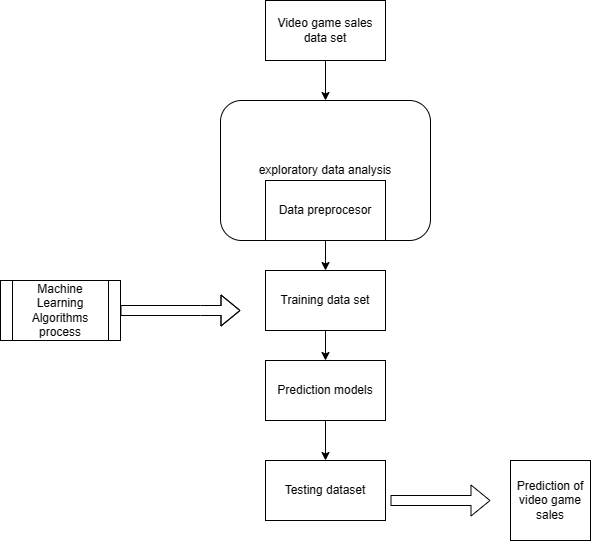

Data preparation and analysis:
Statistical aspects:
Check data dimension
Rows, columns and column names
Data types

Cleaning the data
look for missing data and outliers
identify and convert the categorical values to numerical representation

Statistical calculation:
find relationship of columns and how it affects
check correlation and chi square
correlation relates to numerical columns and chi square relates to categorical columns

Graphical representation of data:
Perform visualization on dataset 

In [2]:
data = pd.read_csv("/kaggle/input/video-games-sales-as-at-22-dec-2016csv/Video_Games_Sales_as_at_22_Dec_2016.csv")
data1 = data.copy()

In [3]:
display(data1.head())
display(data1.tail())

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


given 16 columns:
* global sales will be taken as the variable for dependent variable - the ones we are trying to predict
* independent variables - will either be the critic or the user score: this defines the liking of a certain user

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
print(data.shape)

(16719, 16)


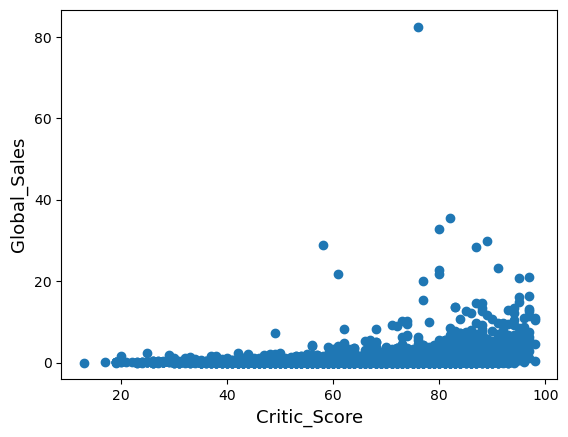

In [6]:
#identifying outliers / missing data
fig, ax = plt.subplots()
ax.scatter(x = data['Critic_Score'], y = data['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()


on the global sales y axis, there is one depicted outlier on y value of 80 - we need to eradicate it

In [7]:
data = data.drop(data[(data['Critic_Score']>60) & (data['Global_Sales']>60)].index)
print(data)

                                Name Platform  Year_of_Release         Genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales

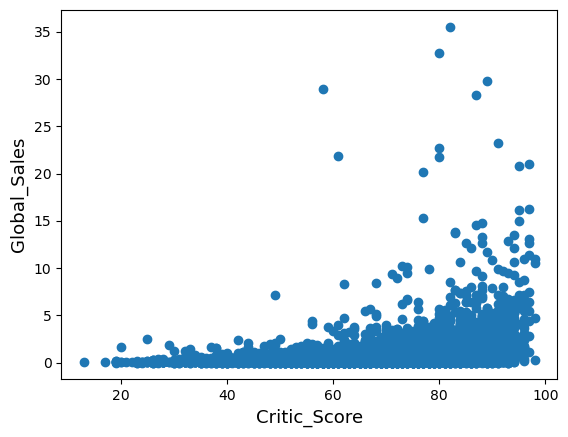

In [8]:
#identifying outliers / missing data
fig, ax = plt.subplots()
ax.scatter(x = data['Critic_Score'], y = data['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()


outlier(s) removed

Check distribution of dependent variable, target dependency the user needs to predict is the *Global_Sales* variable


 mu = 0.53 and sigma = 1.41



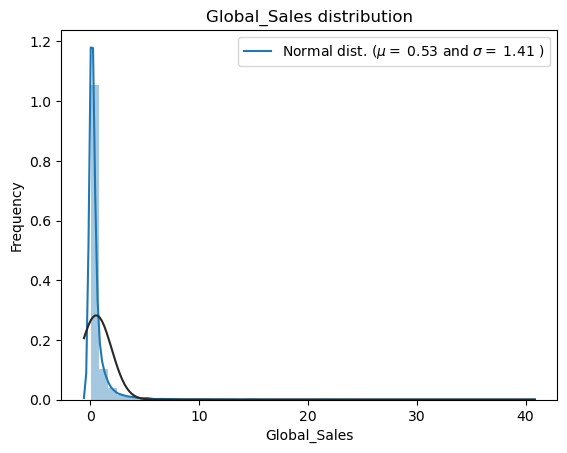

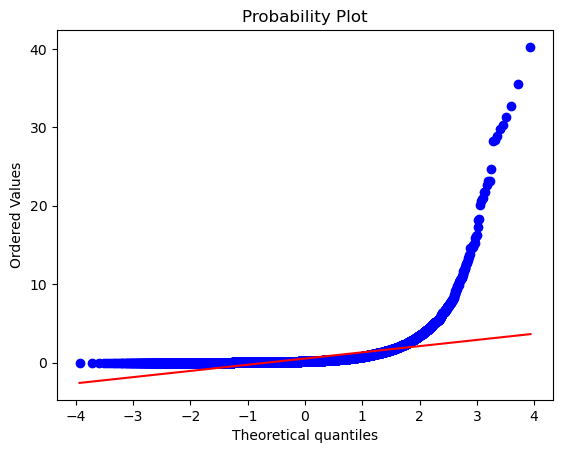

In [9]:
sns.distplot(data['Global_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Global_Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Global_Sales'], plot=plt)
plt.show()

The results illustrate that the distribution graph of Global_Sales is not normally distributed at all, it is aligned far to the left. Meaning that further investigation is required before splitting the data into training and testing set.

To avoid this type of problem, implement the feature correlations so that the variables do not suffer from autocorrelation. This can be an issue in linear regression if need to find intercepts. 

Now, we need to plot correlation heatmap with the aid of seaborn.

<AxesSubplot:title={'center':'Pearson Correlation of Video Game Numerical Features'}>

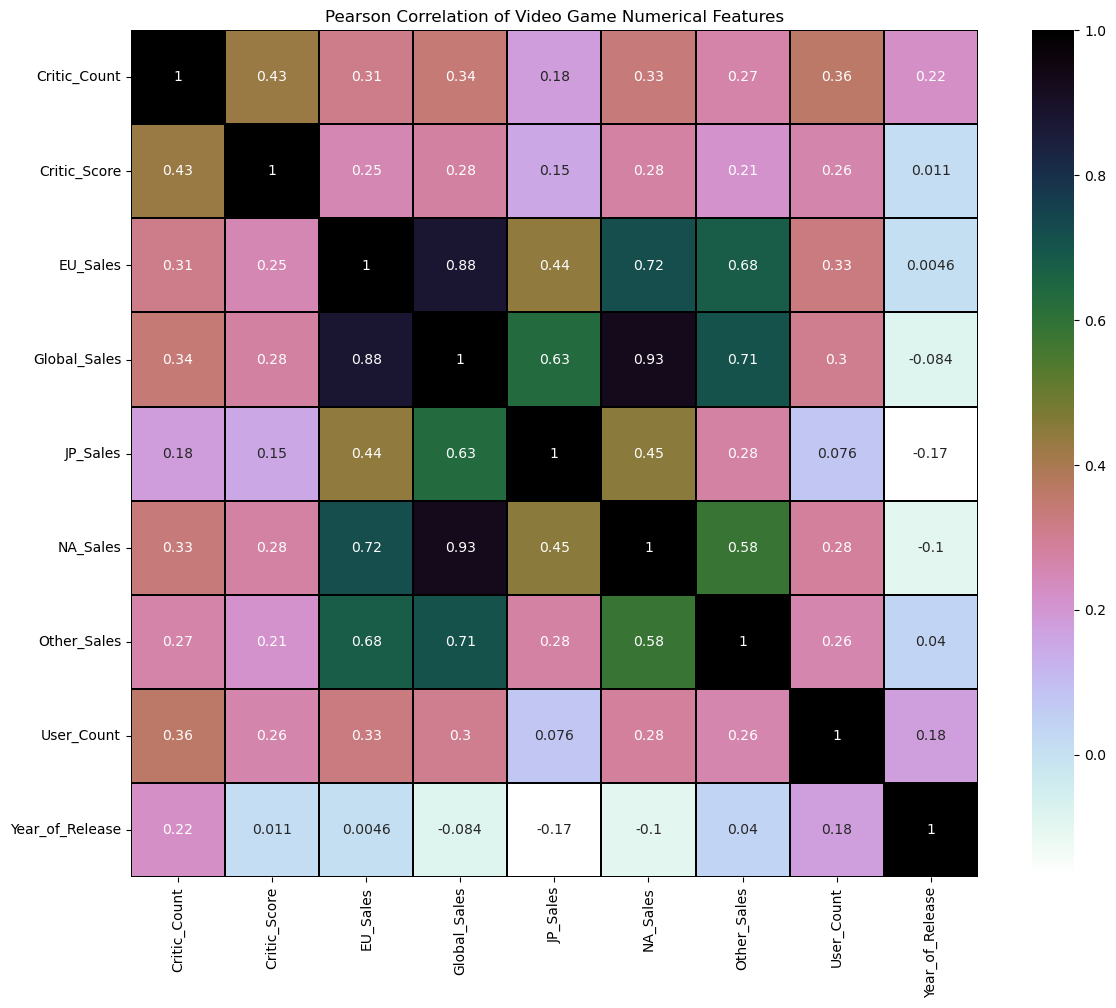

In [10]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data.columns.difference(str_list) 
# Create Dataframe containing only numerical features
data_num = data[num_list]
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

Now, the purpose of creating this heatmap is improve the confidence of choosing which variable can be selected for correlation. The independent variables mentioned in this heatmap are not highly correlated, *except for the sales number which relates to each other.* Therefore, sales are the factor of success in video game publishing, since if sales are well in a region, then the other region will soon follow. This means that the confidence of using Global_Sales variable as the measurement of correlation is highly recommended.

# Steps to remove what variables are not required and keeping the crucial variables that relates to Global_Sales

**most importantly is to remove values with N/A or none data inside**

Afterwards, is to derive features through feature engineering

In [11]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
User_Count,54.605814
Critic_Score,51.333892
Critic_Count,51.333892
Rating,40.489293
User_Score,40.100490
Developer,39.615983
Year_of_Release,1.609044
Publisher,0.323005
Name,0.011963
Genre,0.011963


There are lots of missing data with critic_score, which accounts for 51.33 % ratio of data considered as N/A, User_Score and Critic_Score are more or less the same, which has great confidence as the independent vaiable, however there are many missing data, therefore it cannot easily be filled with median values.

The users needs to check other variables that can account into factor of game sales, preferably the video game consoles then choose which consoles are the famous or highly rated in this data (common occurring) to cover the missing ratio of independent variables changed.

In [12]:
print(pd.value_counts(data["Platform"]))

PS2     2161
DS      2152
PS3     1331
Wii     1319
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


In this century, it is best to find the relevant consoles at the time, values above 140 is best considered, which ranges from Wii U until PS4/XboxOne as the new generation consoles.
This prevents the minimal data issue by keeping relevant consoles.

In [13]:
#use | as OR function in Python
data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]

#Let's double check the value counts to be sure
print(pd.value_counts(data["Platform"]))

#Let's see the shape of the data again
print(data.shape)

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

PS3     1331
Wii     1319
X360    1262
PC       974
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64
(5673, 16)


,Missing Ratio
Critic_Score,37.493390
Critic_Count,37.493390
User_Count,34.584876
Rating,23.761678
User_Score,22.563018
Developer,21.716905
Year_of_Release,1.868500
Publisher,0.229156


38% missing data points is still too large to implement median, therefore, drop all rows that have N/A content in Critic_Score column

In [14]:
data = data.dropna(subset=['Critic_Score'])

#Let's see the shape of the data again
print(data.shape)

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

(3546, 16)


,Missing Ratio
User_Count,5.019741
Year_of_Release,2.002256
Rating,2.002256
User_Score,0.564016
Publisher,0.084602
Developer,0.084602


Dealing further with none values

In [15]:
#Publisher, fill N/A with mode:
data['Publisher'] = data['Publisher'].fillna(data['Publisher'].mode()[0])
#Developer fill N/A with mode
data['Developer'] = data['Developer'].fillna(data['Developer'].mode()[0])
#Rating fill N/A with mode
data['Rating'] = data['Rating'].fillna(data['Rating'].mode()[0])
#Release year with median
data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].median())
#User score and User Count with median
data['User_Score'] = data['User_Score'].replace('tbd', None)
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].median())
data['User_Count'] = data['User_Count'].fillna(data['User_Count'].median())

In [16]:
#check for missing ratios
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


Create dummies for the variables aforementioned:

In [17]:
print(data.shape) #pre-dummies 
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print(data.shape) #post-dummies
data.head

(3546, 16)
(3546, 37)


<bound method NDFrame.head of                                     Name  Year_of_Release  \
2                         Mario Kart Wii           2008.0   
3                      Wii Sports Resort           2009.0   
7                               Wii Play           2006.0   
8              New Super Mario Bros. Wii           2009.0   
13                               Wii Fit           2007.0   
...                                  ...              ...   
16664                   Prison Architect           2016.0   
16696  Metal Gear Solid V: Ground Zeroes           2014.0   
16700                             Breach           2011.0   
16706            STORM: Frontline Nation           2011.0   
16709                            15 Days           2009.0   

                          Publisher  NA_Sales  EU_Sales  JP_Sales  \
2                          Nintendo     15.68     12.76      3.79   
3                          Nintendo     15.61     10.93      3.28   
7                          Nin

# Important step: At this point, when all of the data is held and before splitting it into training and testing data
**Ensure that ONLY required data is needed to be trained and tested, which the variables of User_Score, Release Year, Critic Score, User Count, Platform are taken into factor of measurement**

In [18]:
print(data.columns) #easy to copy-paste the values to rearrange from here

X = data[['Year_of_Release', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T']]

Y = data[['Global_Sales']]

#Double checking the shape
print(X.shape)
print(Y.shape)

Index(['Name', 'Year_of_Release', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Platform_PC',
       'Platform_PS3', 'Platform_PS4', 'Platform_Wii', 'Platform_WiiU',
       'Platform_X360', 'Platform_XOne', 'Genre_Action', 'Genre_Adventure',
       'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_E',
       'Rating_E10+', 'Rating_M', 'Rating_RP', 'Rating_T'],
      dtype='object')
(3546, 29)
(3546, 1)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (2659, 29)
Y_train shape: (2659, 1)
X_test shape: (887, 29)
Y_test shape: (887, 1)


Now, before fitting the models in final, scale the data first by using log transformation of log(1+x), this imports the function from numpy that is called log1p

In [20]:
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)


 mu = 0.43 and sigma = 0.48



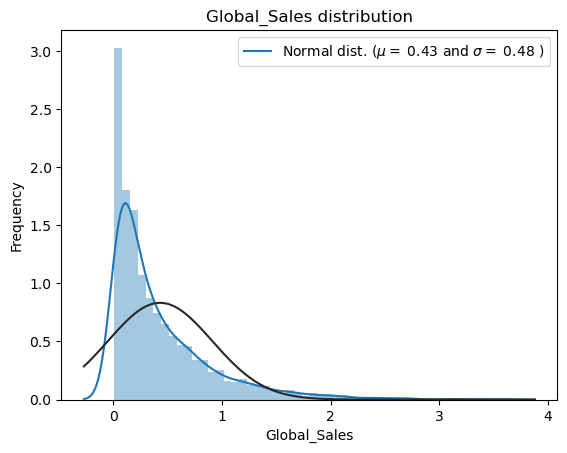

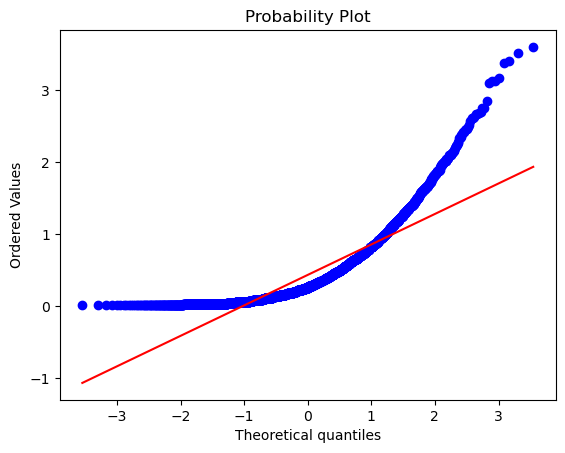

In [21]:
#Draw the new distribution 
Y_log_transformed = np.log1p(data['Global_Sales']) #For comparison to earlier, here's the whole Y transformed
sns.distplot(Y_log_transformed , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Y_log_transformed)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

#Draw the QQ-plot
fig = plt.figure()
res = stats.probplot(Y_log_transformed, plot=plt)
plt.show()

Now to fit the data into the models itself. We will use the X_train and scale the variable with X_Test using the MinMax Scaler from Scikit to fit all the indenpent variables (changing variables) in similar ranges.

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# Regression Model: Code

1. Support Vector Regressor
2. Random Forest

In [23]:
#begin making the model by making parameter grids

param_grid_lr = [{}]


#----SVR----#
param_grid_svr = [{'C': [0.01, 0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1],'kernel': ['rbf']}]

#----Random Forest----#
param_grid_rf = [{'n_estimators': [3, 10, 30, 50, 70], 'max_features': [2,4,6,8,10,12], 'max_depth': [2, 3, 5, 7, 9]}]

After creating the parameters, implement the models sequentially and assess which model is best to forecast video game sales

To assess the models, use **RMSE (Root Mean Squared Error)**; t*he standard deviation of residuals or known as prediction errors, basically a way to measure the differneces between values and to measure the error of a given model when it is used to predict quantitative data.*

RMSE is a judgement factor of how accurately the model can predict the outcome of the video game sales response.

By using RMSE, it will tell the error in actual sales unit.

Note: exponential transformation is requied on RMSE scores, if the RMSE was in logarithmic values - otherwise it remains on log(Global_Sales)

Use cross validation:

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, scoring='neg_mean_squared_error',  cv=5)
grid_search_lr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
lr_best_cross_val_score = (np.sqrt(-grid_search_lr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(lr_best_cross_val_score)))
lr_score = np.sqrt(-grid_search_lr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(lr_score)))

Best parameters: {}
Best cross-validation score: 0.41
Test set score: 0.43


# IMPLEMENTATION OF MODELS
INTRODUCTION, DEFINITIONS, RESULT, SCORE AND EVALUATION

SUPPORT VECTOR REGRESSION:
What is Support Vector Regression?

Support Vector Regression (SVR) is a type of regression algorithm that is based on the concept of *Support Vector Machines (SVM) to determine the outcome of relationships between dependent and independent variables*. It is one of the machine learning models that is utilized to predict continous variables such as stock prices, housing prices and etc based on input variables or features.

The main aspect of SVR is to *identify a hyperplane that best fits the training data so that the error between predicted values and actual values is reduced*. So it tries its best to fit in the correct position of hyperplane to separate the data by the largest margin and uses it to predict the value of the dependent variable for the new data.

This is unique compared to MSE often adopted in ordinary linear regression models to minimize the distance between predicted and actual value according to users' configuration.

The SVR hyperplane is chosen to have a maximum margin; *maximum distance between hyperplane and nearest data points on each side - this is used to segregate the data into 2 classes*: one that lies above and other that lies below the hyperplane.

Goal:** minimize prediction errors and maximize margins**



**SVR Formula**:
*The basic formula for Support Vector Regression (SVR) is similar to that of linear regression, but with additional parameters and constraints to find the optimal hyperplane:*

y = w^T * x + b

where:

y is the predicted output value
x is the input feature vector
w is the weight vector that represents the coefficients of the hyperplane
b is the bias term or intercept
To find the optimal hyperplane, SVR introduces two additional parameters:

C: a regularization parameter that controls the tradeoff between the model complexity and the error on the training data.
ε: a margin parameter that defines the acceptable range of error from the true output value.
The optimization problem for SVR is to find the weight vector w and the bias term b that minimize the following objective function subject to the constraints:

minimize (1/2) * ||w||^2 + C * Σ(max(0, |y - y_hat| - ε))

subject to:

y_hat = w^T * x_i + b, for all i = 1,2,..,n
|y - y_hat| <= ε, for all i = 1,2,..,n
where:

n is the number of training examples
y is the true output value
y_hat is the predicted output value
||w||^2 is the L2 norm of the weight vector w
Σ(max(0, |y - y_hat| - ε)) is the sum of the errors above the margin ε
The objective function is a tradeoff between the complexity of the model (controlled by ||w||^2) and the error on the training data (controlled by the sum of errors). The constraints ensure that the predicted output values are within the margin ε from the true output values.

modeling the relationship of 2 variables; independent and dependent variables, the SVR uses kernel function to transform input data into feature space that has higher dimension. Kernel calculates the similarities of the data pairs that will derive its scalar to represent similarity. Then afterwards, SVR creates the new feature space are then used to predict value of the dependent variable for new data.

**Given in this model, this Support Vector Regressor model uses** ***RBF - Radial Basis Function Kernel***

A kernel function used to transform input data into higher dimensional feature space to implement a linear regression model to fit the data. So what the RBF kernel does is that it measures the similarity between two examples in the input space using a Gaussian Function in an infinite feature space.

K(x, x') = exp(-gamma ||x - x'||^2)
where x and x' are the input examples, ||x - x'||^2 is the squared Euclidean distance between the examples, and gamma is a hyperparameter that determines the width of the Gaussian function.

Advantages and Disadvantages of RBF:
Adv:
1. RBF is able to capture complex non linear relationship in data which can be mapped into higher dimensional space then a linear hyperplane can be drawn to segregate the data
2. Computationally efficient; does not need to compute the full kernel matrix - only the pairwise distances between support vectors and new examples
3. Able to handle complex data and can be tuned with gamma parameter
4. Only has one hyperparameter: width of Gaussian kernel, so it is simple to adjust compared to other kernels

Disadv:
1. RBF kernel is sensitive to choice of hyperparameter and performance is highly dependent on the value of the width of Gaussian Kernel. It requires complex calculation and manual selection of finding the best or optimal value for hyperparamter which requires expertise
2. RBF kernel is prone to overfitting if the width of Gaussian kernel is tiny / underfitting if width is too large. Balancing can be difficult for differentiating complexity and generalization
3. Scaling sensitivity of input features since it requires Euclidean distance between examples. As shown in this model, it has been scaled - if it is not scaled in other circumstances, some features might dominate the distance measure which can affect the model's performance

In [25]:
#SVR CODE
from sklearn.svm import SVR

grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_svr.best_params_))
svr_best_cross_val_score = (np.sqrt(-grid_search_svr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(svr_best_cross_val_score)))
svr_score = np.sqrt(-grid_search_svr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(svr_score)))

Best parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Best cross-validation score: 0.47
Test set score: 0.50


Random Forest Regression: What is Random Forest Regression?

Random forest regression is a machine learning algorithm used in regression problems. It is one of the variant from Random Forest model that is used classification problems. Essentially, it is an approach of regression based on collection of decision trees, hence the name random forest.

Random forest regressor generates decision trees on randomly selected subsets of input data and outputs the mean or median prediction of individual trees as final prediction.

===Keypoint: Builds several decision trees and combine prediction results of each of the decision trees to provide accurate predictions...

Procedural steps of how the algorithm/model work:
1. Random subsets of input data are selected with replacement, this technique is known as bagging - each subset is used to train decision tree model
2. At each node of decision tree, random subset of input features are selected, best feature is chosen to split the node
3. Decision tree will be grown until stopping criterion is reached, maximum depth of minimum number of samples are required to split the node
4. Make a forest of decision trees
5. Make prediction for new example, Random Forest Regressor algorithm takes average or median of predictions of decision trees generated in the forest




RF Regressor Formula:

The way how the model/algorithm work is that:
1. Initiate the set of decision trees are trained on different subsets of the input data using bagging and feature randomization
2. In new input X, RF regressor predicts target variable Y by aggregating the predictions of all individual decision trees = can be done taking average or median of predicted values

Given a training set {(X1, Y1), (X2, Y2), ..., (Xn, Yn)} where Xi is the input example with m features and Yi is the target variable, the Random Forest Regressor algorithm generates T decision trees, each trained on a random subset of the input data and a random subset of the input features.

Let the predicted value of the ith decision tree be denoted as Yi^t(X), where t is the index of the decision tree.

Then, the predicted value of the Random Forest Regressor algorithm for a new input example X is given by:

Y = (1/T) * ∑(i=1 to T) Yi^t(X)

Y = final predicted value
sum is taken over all T decision trees

RF regressor uses weighted average or median of predicted values; weights are proportional to accuracy of each decision tree.


Advantage and Disadvantages of Random Forest Regressor:
Adv:
1. Random Forest can handle both categorical and continous input features
2. Can handle missing/noisy data, also performs well with datasets that has high dimensionality. Handles data that does not have normal distribution as well
3. Can identiy the most significant independent variables that affects the variablity of dependent variable
4. Less prone to overfitting compared to normal individual decision trees, since it adopts averaging or using median based aggregation of predictions with the help of multiple trees
5. Provides importance scores for input features that allows identification of most significant input features in prediction

Disadv:
1. Random Forest Regressor are slower to train and making predictions can be hindered compared to simpler regression algorithms (higher computational time complexity)
2. More difficult to interpret than linear regression model or individual decision trees; does not provide clear relationship explanation of independent and dependent variables overloads the system resource usage which decreases performance that requires the user to tune it carefully
3. Hyperparameters: number of trees, depth of trees and number of features used at each node severely 
4. Random Forest Regressor does not perform well on datasets that has imbalanced class distributions, since the majority will dominate the tree building process that might lead to biased predictions result

In [26]:
from sklearn.ensemble import RandomForestRegressor

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_rf.best_params_))
rf_best_cross_val_score = (np.sqrt(-grid_search_rf.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(rf_best_cross_val_score)))
rf_score = np.sqrt(-grid_search_rf.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(rf_score)))

Best parameters: {'max_depth': 9, 'max_features': 12, 'n_estimators': 70}
Best cross-validation score: 0.34
Test set score: 0.36


# Conclusion of the 2 models used:

Plotting feature importance of what determines a good video game sales forecast:


In [27]:

# from sklearn.svm import SVR

# # =======Depicting feature importance using Support Vector Regressor=======
# feature_importance = grid_search_svr.best_estimator_.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.figure(figsize=(20,10))
# plt.subplot(1, 2, 2)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X_train.columns.values[sorted_idx]) #Not 100 % sure the feature names match the importances correctly...
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

Apparently, SVR does not support feature importances unlike Random Forest to Visualize the factors of making a good video game sales prediction
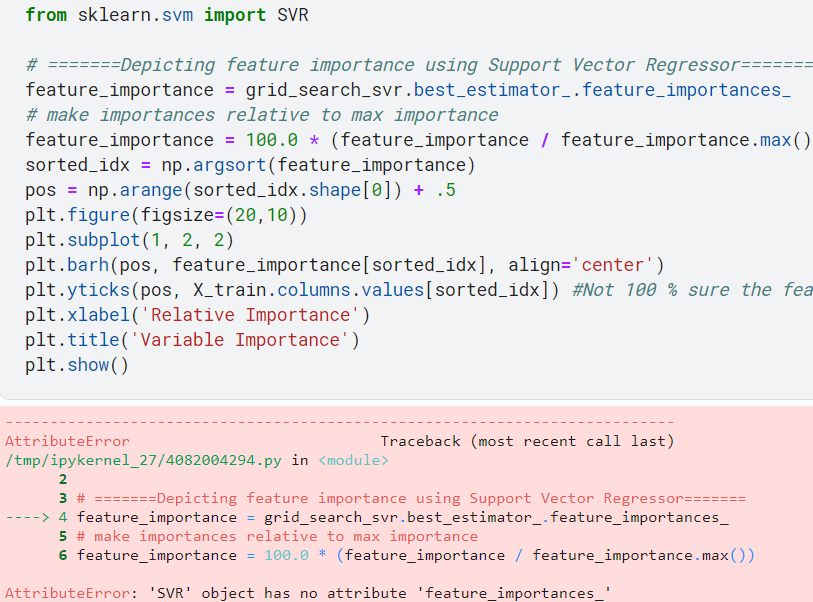

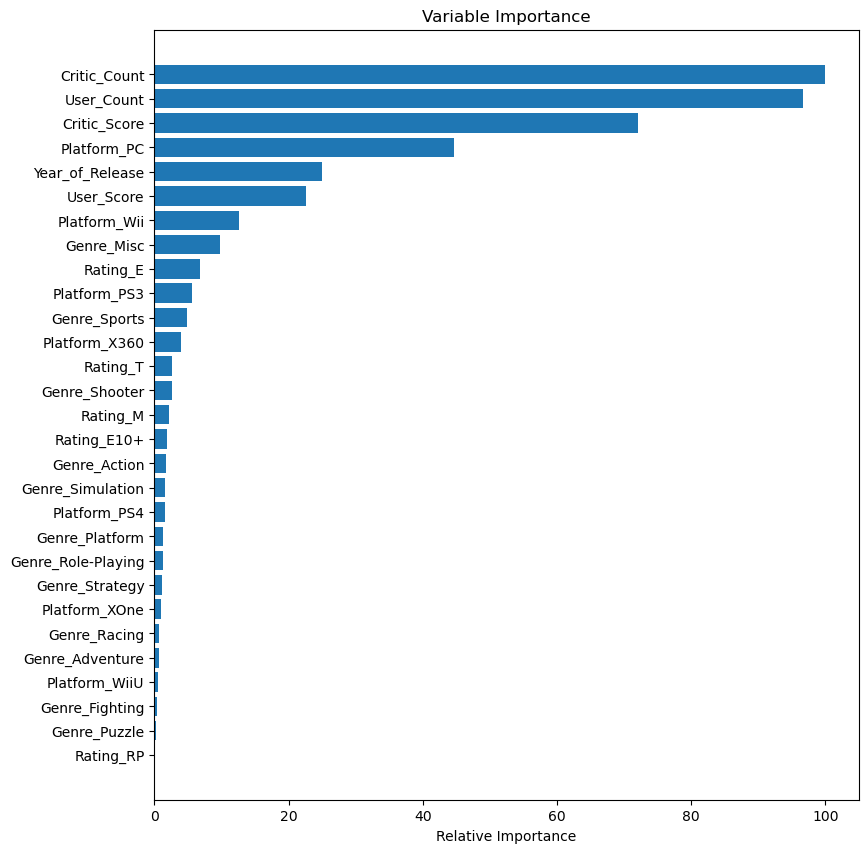

In [28]:
# =======*** Depicting feature importance using Random Forest Regressor ***=======
feature_importance = grid_search_rf.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns.values[sorted_idx]) #Not 100 % sure the feature names match the importances correctly...
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Relative importance observation shows that the biggest factor that affect the sales come from 4 variables, namely:
* Critic Count
* User Count
* Critic Score
* Platform of the game (Console/PC)

which determines a good sale prediction of what the game is meant to be released on what platform that the audiences use primarily in the given time of the year

Based solely on the test scores and cross-validation scores provided, the **Random Forest Regressor is the best model** seen in this video game sales forecast, with a very small difference of test set score and cross-validation score. As observed, it is* 0.35 for cross validation and 0.37 for test set score*; meaning that it has 0.02 difference from the predicted output deviation.

> !!Important Note!!
> Everytime the machine learning model is ran, it might lead to different score, for example, the running all will give Random Forest Regressor as 0.34 for cross validation and 0.37 for test set score, indicating that it might be affected by the training method, evaluation procedure or different machines running in the background - therefore to keep note that the first data outcome might not be the same as the second one (FIRST RESULT: 0.35 cross validation and 0.37 test set score)
> THIRD SCORE: 0.34 cross validation and 0.36 Test set score
> As shown on multiple times testing, there is only 0.02 percent difference for each versions used in this notebook, therefore Random Forest Regressor is the wise choice



In this context, smaller difference between two scores is considered desirable to choose; meaning that the model is not overfitting to the training data. Also it does not perfectly match, meaning that the model has less chance of underfitting and generalizing well to new data correctly.

General rule, should not be more than 1-2% difference between test set score and cross validation since it indicates overfitting or bias in the model. The **Support Vector Regressor fails to predict the outcome** since it has cross-*validation score of 0.47 and test set score of 0.5* - which is a very high value for outcome prediction and has 0.03 difference - this might be because of the parameters not tuned correctly or an issue from the dataset complexity and the model used that will be determined by evaluation metric.

Range of evaluation metrics is also required to consider overall performance on model. ---> continued on next note

Note:
However, it is important to note that model selection should not be based solely on these scores, and other factors such as interpretability, training time, and computational complexity may also be important considerations depending on the specific requirements of the task. Additionally, it is recommended to evaluate the models on multiple evaluation metrics and perform statistical significance tests to ensure that the observed differences in performance are not due to chance.

Always consider the specific context and goals of the project when evaluating model performance

Therefore, what makes a good video game sales forecast, is mainly related to the scores of the video game, given by critic reviewers such as *IGN, Gamespot, VideoGameCritic, MetaCritic, GamesRadar and much more.*

> *Sales forecasting is one of the statistical approaches of determining the video game success, whether in the future outcome it has a negativity trend based on the plot/story/gameplay or positively on the userbase/general critic/ trends in console gaming to allow companies to make decisions carefully of releasing a certain video game on the correct time/season/current events to boost sales in units.*

*The reviewers determine the sale as it influences audience which genre and type to buy in the year. Along with the popularity of the console, the company needs to focus on developing the software on the right architecture, whether it will be on the Wii, Xbox, PS or PC to gain attraction of already existing console users to persuade them to buy the game.*

Random changes in test set score and cross validation proof
As important note in observing the best result of the model evaluation

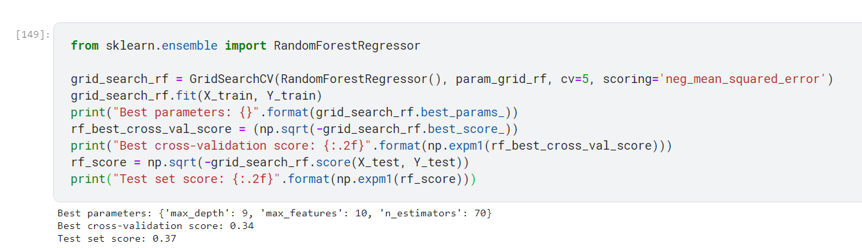
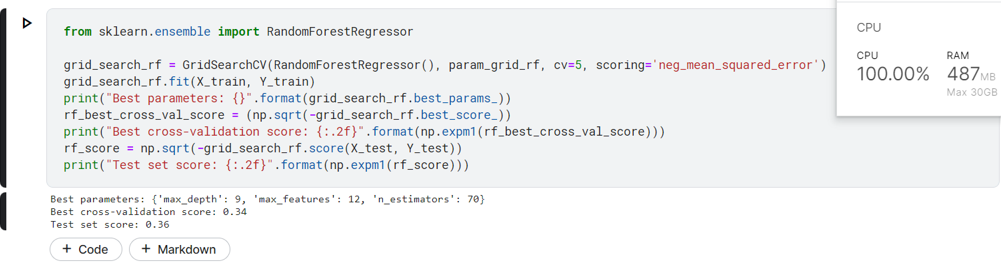
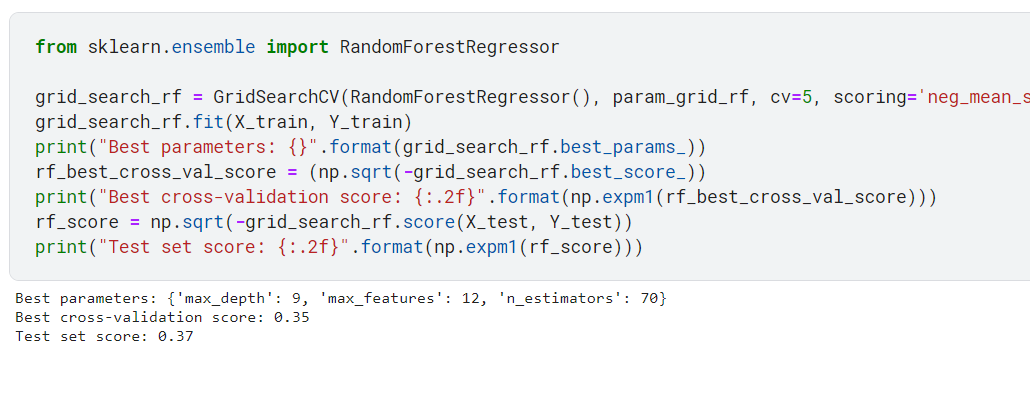
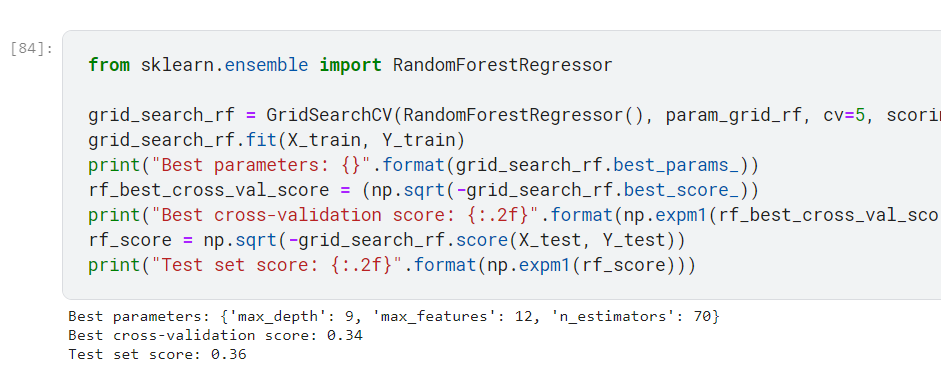